# Lab | Customer Analysis Round 3

For this lab, we still keep using the `marketing_customer_analysis.csv` file. You can find the file in the `files_for_lab` folder.

### Get the data

- Use the same jupyter file from the last lab, `Customer Analysis Round 3`

### EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:

- Show DataFrame info.
- Describe DataFrame.
- Show a plot of the total number of responses.
- Show a plot of the response rate by the sales channel.
- Show a plot of the response rate by the total claim amount.
- Show a plot of the response rate by income.


In [468]:
# Importing the libraries + the cleaning function i made in the previous lab

import pandas as pd

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# I want to use the function (df_cleaning) that i defined in the previous lab.

# %run "/Users/leozinho.air/Desktop/ironhack_da/class_04/lab-customer-analysis-round-2/cleaning_fun_customer_df.ipynb"



In [469]:
# Importing the dataframe

customer_df = pd.read_csv("/Users/leozinho.air/Desktop/ironhack_da/class_04/lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv")

# Cleaning operations

columns = []

for i in range(len(customer_df.columns)):
    columns.append(customer_df.columns[i].lower().replace(' ', '_'))

customer_df.columns = columns

customer_df

# Dropping the column 'unnamed:_0'

customer_df = customer_df.drop(['unnamed:_0'], axis = 1)


customer_df


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [470]:
# 1. Show the DataFrame info

customer_df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   state                          10279 non-null  object 
 2   customer_lifetime_value        10910 non-null  float64
 3   response                       10279 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective_to_date              10910 non-null  object 
 7   employmentstatus               10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  int64  
 10  location_code                  10910 non-null  object 
 11  marital_status                 10910 non-null  object 
 12  monthly_premium_auto           10910 non-null 

In [471]:
# 2. Describe DataFrame.

customer_df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527
50%,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


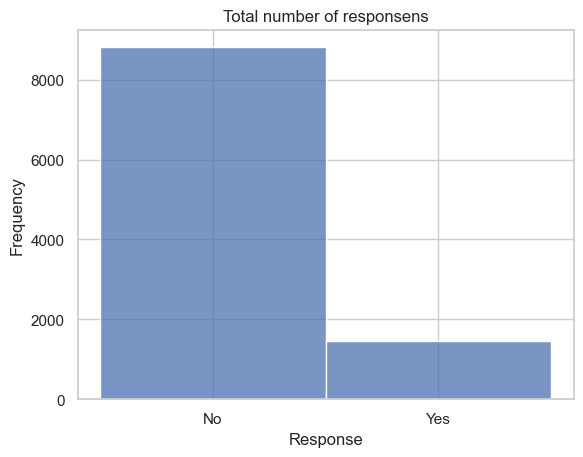

In [472]:
# 3. Show a plot of the total number of responses

sns.histplot(customer_df['response'], stat = 'count')
plt.xlabel('Response')
plt.ylabel('Frequency')
plt.title('Total number of responsens')
plt.show()

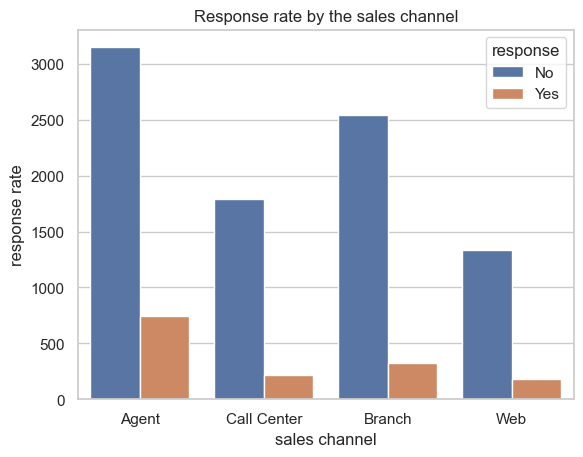

In [473]:
# 4. Show a plot of the response rate by the sales channel.

# Solution made before the seeing Carol's solution

customer_df['response'].isnull().values.any() # checking if there are any Nan values -> True

customer_df['response'].isnull().sum() # checking how many of them -> 631

customer_df = customer_df.dropna(subset=['response'])

customer_df['response'].isnull().values.any() # Now there are no Nans

# Creating a countplot
sns.countplot(x = customer_df['sales_channel'], hue = customer_df['response'], data=customer_df) # In Seaborn, the hue parameter is used to create grouped plots based on a categorical variable. When you set hue in a barplot (or other categorical plots), it essentially creates separate bars for each unique value in the hue variable, making it easier to visualize the relationship between multiple categorical variables.
plt.xlabel('sales channel')
plt.ylabel('response rate')
plt.title('Response rate by the sales channel')
plt.show()


In [495]:
# 5. Show a plot of the response rate by the total claim amount

customer_df['total_claim_amount'].describe() # max 2893 | min 0.09 | 75% of the values are around 600

bin_edges = [0, 150, 300, 450, 600, 3000]
bin_labels = ['0-150','151-301','301-450','451-600','600+']
# Create the 'claim_bins' column with custom bin edges
customer_df['claim_bins'] = pd.cut(customer_df['total_claim_amount'], bins=bin_edges, labels = bin_labels)

customer_df['claim_bins'].unique()



['151-301', '600+', '451-600', '301-450', '0-150']
Categories (5, object): ['0-150' < '151-301' < '301-450' < '451-600' < '600+']

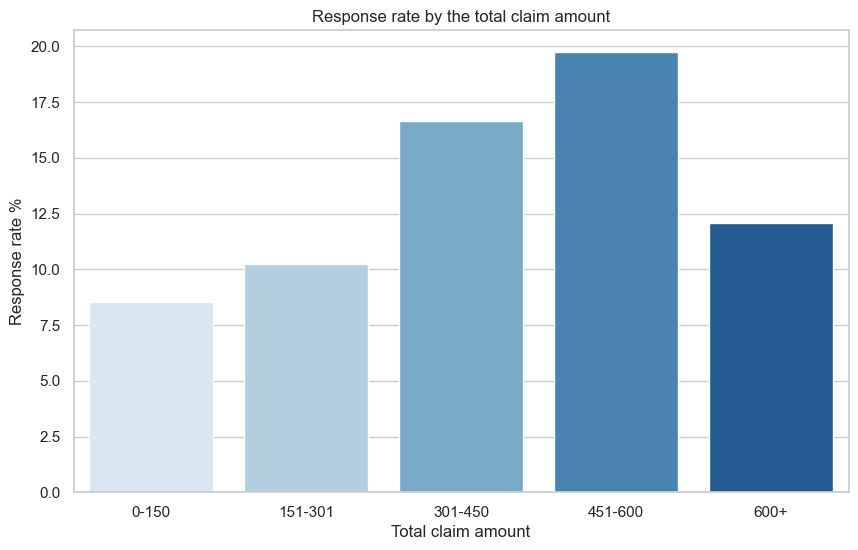

In [496]:

# Creating a new Df grouping claim bins with response

grouped = customer_df.groupby('claim_bins')['response'].value_counts(normalize = True).unstack().fillna(0)
grouped

# Creating a new column with the percentual rate of claim/'Yes'

grouped['perc_rate'] = grouped['Yes'] * 100

grouped

# Reset the index to make claim_bins a regulare column

grouped.reset_index(inplace=True)

grouped

# Create a bar plot to visualize the response rate by sales channel using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='claim_bins', y='perc_rate', data=grouped, palette="Blues")
plt.xlabel('Total claim amount')
plt.ylabel('Response rate %')
plt.title('Response rate by the total claim amount')
plt.show()

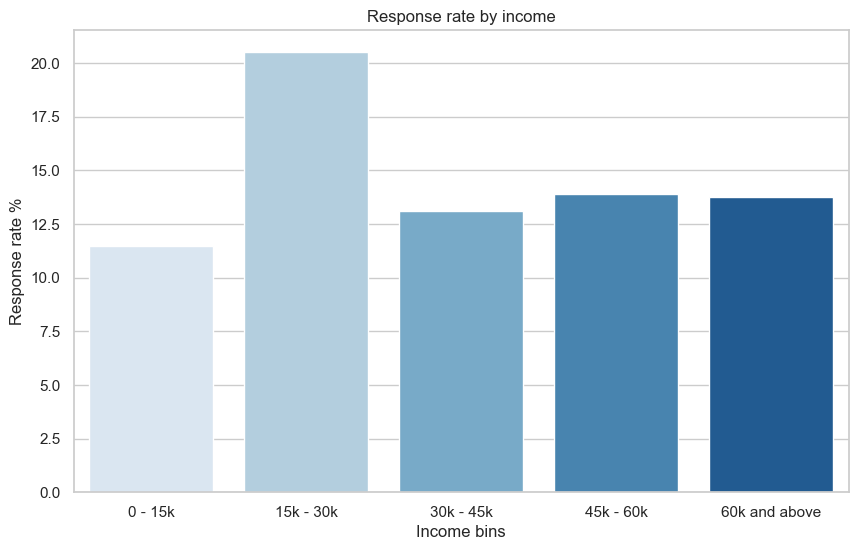

0

In [512]:
# 6. Show a plot of the response rate by income.

# First solution : using right = False parameter (i used chatgtp to debug though)

customer_df['income'].describe() # min = 0.000000 75% = 62100 max = 99981

customer_df['income'].isnull().values.any() # there are no nan values

bin_edges = [0, 15000, 30000, 45000, 60000, 999999999]

bin_labels = ['0 - 15k','15k - 30k','30k - 45k','45k - 60k','60k and above']

# Here i got in troubles because 0 values were not included on the first bin (0 - 15000). Then the solution:

customer_df['income_bins'] = pd.cut(customer_df['income'], bins = bin_edges, labels = bin_labels, right = False) # The left edge of the bin belongs to that bin, and the right edge belongs to the next bin. I had to use this parameter because there were some values (0) overlapping the bins and giving nan values

customer_df['incomes_bins'].isnull().values.any() # Now there are no nan values

grouped = customer_df.groupby('income_bins')['response'].value_counts(normalize = True).unstack()

grouped['perc_rate'] = grouped['Yes'] * 100

grouped.reset_index(inplace = True)

grouped

plt.figure(figsize=(10, 6))
sns.barplot(x='income_bins', y='perc_rate', data=grouped, palette="Blues")
plt.xlabel('Income bins')
plt.ylabel('Response rate %')
plt.title('Response rate by income')
plt.show()


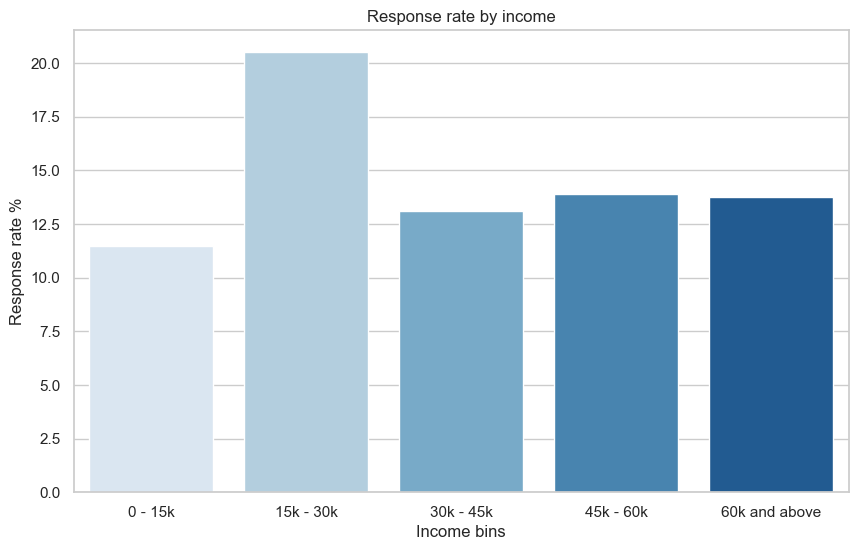

In [514]:
# Show a plot of the response rate by income.

# Second solution : setting -1 / 15000 as the first bin (no chat gpt)

customer_df['income'].describe() # min = 0.000000 75% = 62100 max = 99981

customer_df['income'].isnull().values.any() # there are no nan values

# Setting -1 as first bin value the list will count 0 values on the first bin

bin_edges = [-1, 15000, 30000, 45000, 60000, 999999999]


bin_labels = ['0 - 15k','15k - 30k','30k - 45k','45k - 60k','60k and above']

customer_df['incomes_bins'] = pd.cut(customer_df['income'], bins = bin_edges, labels = bin_labels)

customer_df['incomes_bins'].isnull().sum() # no nans

grouped = customer_df.groupby('incomes_bins')['response'].value_counts(normalize = True).unstack()

grouped['perc_rate'] = grouped['Yes'] * 100

grouped.reset_index(inplace = True)

grouped

plt.figure(figsize=(10, 6))
sns.barplot(x='incomes_bins', y='perc_rate', data=grouped, palette="Blues")
plt.xlabel('Income bins')
plt.ylabel('Response rate %')
plt.title('Response rate by income')
plt.show()